In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [3]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [4]:
#Gradient Discent
def RMSProp(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    epsilon = 0.5
    beta = 0.95
    update_w, update_b = 0,0
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                update_w = beta * update_w + (1 - beta)* dw**2
                update_b = beta * update_b + (1- beta) * db**2 
                w = w - (lr/np.sqrt(update_w + epsilon))*dw
                b = b - (lr/np.sqrt(update_b + epsilon))*db
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch RMSProp\nBatch Size = {}\nInitial Learning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 18.6102944674232

Loss after 1th epoch = 18.60552238858791

Loss after 2th epoch = 18.60066400312436

Loss after 3th epoch = 18.59571406145307

Loss after 4th epoch = 18.59066747031593

Loss after 5th epoch = 18.585519216798648

Loss after 6th epoch = 18.58026430511853

Loss after 7th epoch = 18.57489770284291

Loss after 8th epoch = 18.56941429406548

Loss after 9th epoch = 18.56380883766501

Loss after 10th epoch = 18.55807592919128

Loss after 11th epoch = 18.55220996522177

Loss after 12th epoch = 18.5462051092469

Loss after 13th epoch = 18.540055258295084

Loss after 14th epoch = 18.533754009617883

Loss after 15th epoch = 18.527294626831182

Loss after 16th epoch = 18.520670004958056

Loss after 17th epoch = 18.513872633847512

Loss after 18th epoch = 18.506894559454917

Loss after 19th epoch = 18.499727342465842

Loss after 20th epoch = 18.492362013726765

Loss after 21th epoch = 18.484789025914964

Loss after 22th epoch = 18.476998200834394

Loss after 2

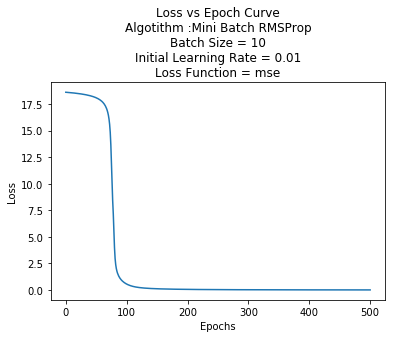

In [7]:
W,B = RMSProp(x,y,500,10,'mse',0.01)

In [8]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[-1.5475604575635369, -1.5399514142544544, -1.5322829203575909, -1.5245493185881061, -1.5167455857386172, -1.5088671870011487, -1.5009099607884087, -1.4928700266653461, -1.4847437109883732, -1.4765274862348825, -1.4682179209898796, -1.4598116382677921, -1.451305280369517, -1.4426954788632316, -1.4339788285700981, -1.4251518646586852, -1.4162110421228413, -1.4071527170497331, -1.397973129187049, -1.3886683853976971, -1.379234443651614, -1.369667097251263, -1.3599619590227128, -1.3501144452299332, -1.3401197589875917, -1.3299728729582978, -1.3196685111246556, -1.3092011294251311, -1.2985648950358344, -1.2877536640678717, -1.2767609574316816, -1.265579934595302, -1.2542033649320996, -1.2426235963141246, -1.2308325205586339, -1.2188215352757148, -1.2065815015921559, -1.1941026971379605, -1.1813747635736855, -1.1683866478046878, -1.1551265358668572, -1.1415817782705386, -1.1277388053464206, -1.1135830308382368, -1.0990987416185058, -1.084268970947994, -1.0690753521354612, -1.

Loss after 0th epoch = 321.30971038766063

Loss after 1th epoch = 305.59618722621

Loss after 2th epoch = 292.8116434907844

Loss after 3th epoch = 281.4776648547403

Loss after 4th epoch = 271.0176677796441

Loss after 5th epoch = 261.13837629442327

Loss after 6th epoch = 251.66836242575323

Loss after 7th epoch = 242.49841378411293

Loss after 8th epoch = 233.55480819734345

Loss after 9th epoch = 224.78571407722444

Loss after 10th epoch = 216.15361239114222

Loss after 11th epoch = 207.6307755812312

Loss after 12th epoch = 199.19642363125806

Loss after 13th epoch = 190.83485929126843

Loss after 14th epoch = 182.53420538624835

Loss after 15th epoch = 174.2855294899499

Loss after 16th epoch = 166.08222847817595

Loss after 17th epoch = 157.91959488885902

Loss after 18th epoch = 149.7945164534776

Loss after 19th epoch = 141.70527869197377

Loss after 20th epoch = 133.65145297347047

Loss after 21th epoch = 125.63386177920282

Loss after 22th epoch = 117.65462090571434

Loss af

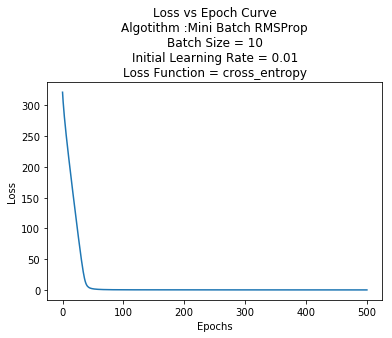

In [11]:
W,B = RMSProp(x,y,500,10,'cross_entropy',0.01)

In [12]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[-1.6993175390449926, -1.6236839637144302, -1.5621804964895527, -1.5076527449295629, -1.4573171960052047, -1.4097592207859908, -1.3641519043588799, -1.3199680195403622, -1.2768510736744383, -1.2345497249320041, -1.1928812407681879, -1.1517096856511191, -1.1109321802652483, -1.0704698647945234, -1.0302617462474817, -0.9902603916540863, -0.95042884814893214, -0.91073840734771871, -0.87116697091990014, -0.8316978603158911, -0.79231896942338942, -0.75302219764080403, -0.71380313053566935, -0.67466096156988753, -0.63559867621653987, -0.59662355451278204, -0.55774809663028213, -0.51899154804229375, -0.48038230933056392, -0.44196167550723475, -0.40378956914994923, -0.365953183249837, -0.32857958939301363, -0.29185294111680293, -0.25603480202806428, -0.22148040704762481, -0.18863322682022732, -0.15797175105063793, -0.12989810130881185, -0.10461227698102255, -0.082056764862936546, -0.06196820842333195, -0.043984282202526495, -0.027735031038933832, -0.012891562425378238, 0.0008190

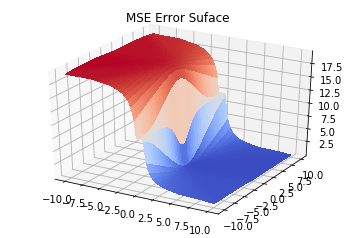

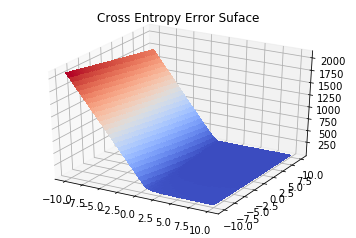

In [13]:
#Error Surface MSE
w = np.linspace(-10,10,num = 1000,dtype = np.float)
b = np.linspace(-10,10,num = 1000,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()